In [122]:
import cv2
import matplotlib.pyplot as plt


In [123]:
img = cv2.imread('./../study/test_img/Lenna.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ...,
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)

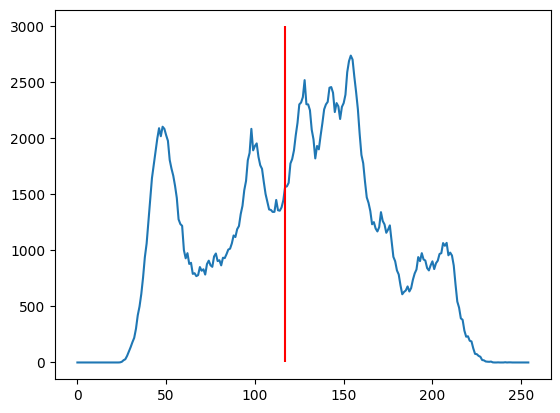

117.0


In [124]:
# 라이브러리 사용
T, lenna_otsu = cv2.threshold(img,-1, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU )
hist = cv2.calcHist([img],[0], None,[255],[0,256])

# histogram
plt.plot(hist)
plt.vlines(T,0,3000,colors = 'red')
plt.show()
print(T)
cv2.imshow('lenna_otsu', lenna_otsu)
cv2.waitKey()
cv2.destroyAllWindows()

In [125]:

hist

array([[0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [1.000e+00],
       [6.000e+00],
       [2.000e+01],
       [2.900e+01],
       [5.900e+01],
       [9.700e+01],
       [1.370e+02],
       [1.810e+02],
       [2.200e+02],
       [3.010e+02],
       [4.210e+02],
       [5.000e+02],
       [6.120e+02],
       [7.600e+02],
       [9.400e+02],
       [1.062e+03],
       [1.254e+03],
       [1.443e+03],
       [1.646e+03],
       [1.761e+03],
       [1.882e+03],
       [1.998e+03],
       [2.092e+03],
       [2.020e+03],
       [2.105e+03],
       [2.086e+03],


In [129]:
import pandas as pd
import numpy as np
f_img = img.flatten()
counts = pd.value_counts(sorted(f_img)).sort_index()
hist = np.array([[counts.loc[i]] if i in counts.index else [0] for i in range(1,256)], np.float32)

In [130]:
hist

array([[0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [1.000e+00],
       [6.000e+00],
       [2.000e+01],
       [2.900e+01],
       [5.900e+01],
       [9.700e+01],
       [1.370e+02],
       [1.810e+02],
       [2.200e+02],
       [3.010e+02],
       [4.210e+02],
       [5.000e+02],
       [6.120e+02],
       [7.600e+02],
       [9.400e+02],
       [1.062e+03],
       [1.254e+03],
       [1.443e+03],
       [1.646e+03],
       [1.761e+03],
       [1.882e+03],
       [1.998e+03],
       [2.092e+03],
       [2.020e+03],
       [2.105e+03],
       [2.086e+03],


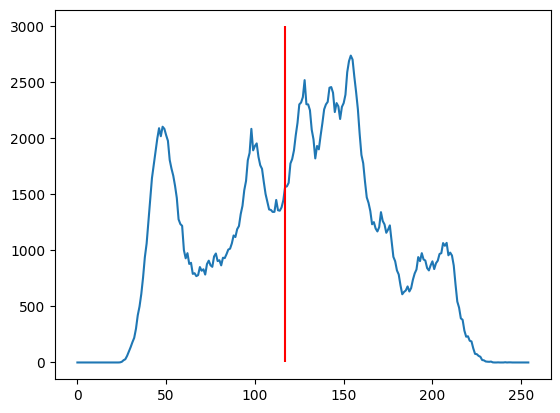

In [131]:
import matplotlib.pyplot as plt
# histogram

plt.plot(hist)
plt.vlines(T,0,3000,colors = 'red')

In [24]:
import pandas as pd
import numpy as np
result = pd.DataFrame(columns = ['임계값', '내부 분산','외부 분산'])
hist= hist.flatten()
c = sum(hist)
for i in range(0,255):
    background = hist[:i]
    foreground = hist[i:]

    weight_b = sum(background)/c
    weight_f = sum(foreground)/c
    if sum(background) == 0:
        mu_b = 0
        var_b =0
    else:
        var_b = sum([(j-mu_b)**2 * hist[j] for j in  range(i)])/sum(background)
        mu_b = sum([j * hist[j] for j in  range(i)])/sum(background)
        
    if sum(foreground) == 0:
        mu_f = 0
        var_f =0
    else:
        mu_f = sum([j * hist[j] for j in  range(i, 255)])/sum(foreground)
        var_f = sum([(j-mu_f)**2 * hist[j] for j in  range(i, 255)])/sum(foreground)

    result.loc[len(result)] = [i,weight_b*var_b + weight_f*var_f , weight_b*weight_f*((mu_b-mu_f)**2)]


In [25]:
thresh = result['내부 분산'].argmin()
thresh

117

In [43]:
threshold_img = img.copy()
threshold_img

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ...,
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)

In [48]:
o_shape = threshold_img.shape
threshold_img = np.where(threshold_img.flatten() >=thresh, 255,0)

In [49]:
threshold_img=threshold_img.reshape(o_shape)
threshold_img = threshold_img.astype(np.uint8)
threshold_img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [50]:
img

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ...,
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)

In [51]:
cv2.imshow('lenna_my_otsu', threshold_img)
cv2.waitKey()
cv2.destroyAllWindows()